## Deyvi Caicedo Bootcamp Inteligencia Artificial
### Matricula Financiera

#### Históricamente, en la institución se han establecido auxilios educativos, como lo son las becas, los patrocinios, los descuentos, los alivios etc, de acuerdo a esta directriz, se han venido incrementando estas ayudas, en algunos periodos de forma excesiva.  


<img src="becas y descuentos.jpg"> 

#### Analizando estos procesos, principalmente son muy manuales y requieren una intervención efectiva para no degradar las finanzas de la institución. Este ejercicio propone mediante machine learning y técnicas de inteligencia artificial, predecir los descuentos que se harán en un periodo especifico, basado en los históricos y metas de los último 5 años.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 1. Cargue y Preprocesamiento de los datos:

In [2]:
# Cargar el dataset
file_path = 'Matriculas_Original.csv'

In [3]:
# Cargar el dataset
file_path = 'Matriculas_Original.csv'
# Intentar con diferentes delimitadores
df = pd.read_csv(file_path, encoding='utf8', delimiter=';') 
##df = pd.read_csv(file_path, encoding='latin1', delimiter=';')  # Por ejemplo, si el delimitador es punto y coma
##df = pd.read_csv(file_path, encoding='latin1')  # Usa 'latin1' para manejar caracteres especiales

C:\Users\deyvi.caicedo\AppData\Local\Temp\ipykernel_24380\153522365.py:4: DtypeWarning: Columns (3,23,25,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf8', delimiter=';')


In [4]:
# Listar las variables de tipo float
variables_float = df.select_dtypes(include=['float64']).columns.tolist()

# Información general sobre las variables de tipo float
print("Variables de tipo float en el dataset:")
for variable in variables_float:
    print(f"\nDescripción de la variable '{variable}':")
    print(df[variable].describe())

Variables de tipo float en el dataset:

Descripción de la variable 'Nombres':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Nombres, dtype: float64

Descripción de la variable 'Apellidos':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Apellidos, dtype: float64

Descripción de la variable 'Centro de costo':
count    1.833341e+06
mean     2.495494e+07
std      1.938126e+06
min      2.200310e+07
25%      2.310319e+07
50%      2.460375e+07
75%      2.711375e+07
max      2.836358e+07
Name: Centro de costo, dtype: float64

Descripción de la variable 'Ofi de ventas':
count    308120.000000
mean        470.616412
std         194.082821
min         200.000000
25%         310.000000
50%         449.000000
75%         710.000000
max         816.000000
Name: Ofi de ventas, dtype: float64

Descripción de la variable 'Crédito':
count    0.0
mean     NaN
std      NaN
min    

In [5]:
df.replace({',': '.'}, regex=True, inplace=True)


In [6]:
# Eliminar o rellenar valores nulos
df.fillna(0, inplace=True)

In [7]:
# Seleccionar las columnas deseadas
columnas_deseadas = [
    'Centro de costo',
    'Periodo Académico',
    'Ingreso bruto',
    'Beca',
    'Descuento',
    'Desc. Pronto pago',
    'Patrocinio',
    'Recargo',
    'Subsidio',
    'Crédito convenio2',
    'Crédito icetex',
    'Ingreso neto',
    'Año'
]
df = df[columnas_deseadas]

In [8]:
df.describe()

,Centro de costo,Periodo Académico,Beca,Descuento,Desc. Pronto pago,Patrocinio,Recargo,Crédito convenio2,Año
count,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06,1.924122e+06
mean,2.377755e+07,2.020015e+05,3.980020e+04,9.641504e+04,1.487055e+04,-4.079182e+03,8.535542e+03,1.139751e+05,2.019629e+03
std,5.619117e+06,2.481778e+02,2.374451e+05,2.363219e+05,3.830412e+04,2.384658e+05,3.874356e+04,4.667576e+05,2.491769e+00
min,0.000000e+00,2.016100e+05,0.000000e+00,0.000000e+00,0.000000e+00,-6.360400e+06,-3.629000e+05,0.000000e+00,2.016000e+03
25%,2.300328e+07,2.017650e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03
50%,2.460323e+07,2.019650e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03
75%,2.710327e+07,2.022150e+05,0.000000e+00,7.743000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.022000e+03
max,2.836358e+07,2.024910e+05,2.558400e+07,5.931240e+06,4.574790e+05,7.579800e+06,1.290480e+06,7.694600e+06,2.024000e+03


In [9]:
df.count()

Centro de costo      1924122
Periodo Académico    1924122
Ingreso bruto        1924122
Beca                 1924122
Descuento            1924122
Desc. Pronto pago    1924122
Patrocinio           1924122
Recargo              1924122
Subsidio             1924122
Crédito convenio2    1924122
Crédito icetex       1924122
Ingreso neto         1924122
Año                  1924122
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of          Centro de costo  Periodo Académico Ingreso bruto  Beca  Descuento  \
0             24103234.0             201615       1534000   0.0        0.0   
1             22003156.0             201610    1906999.98   0.0        0.0   
2             27203201.0             201615       1534000   0.0        0.0   
3             24103189.0             201610       1907000   0.0        0.0   
4             22003464.0             201610       2751000   0.0        0.0   
...                  ...                ...           ...   ...        ...   
1924117       23003266.0             202445       1202450   0.0   300613.0   
1924118       23003482.0             202445       4368100   0.0        0.0   
1924119       23103817.0             202413       3500700   0.0   610170.0   
1924120       23103329.0             202429       5540900   0.0        0.0   
1924121       23103693.0             202413       3500700   0.0        0.0   

         Desc. Pronto pago  Pat

In [11]:
def sumar_columnas(df):
    # Calcular la suma de cada columna numérica
    suma_columnas = df.sum(numeric_only=True)
    
    # Crear un DataFrame con los resultados
    suma_summary = pd.DataFrame({
        'Columna': suma_columnas.index,
        'Suma Total': suma_columnas.values
    })    
    return suma_summary

# Obtener la suma de cada columna para evaluar
suma_summary = sumar_columnas(df)
print(suma_summary)

             Columna    Suma Total
0    Centro de costo  4.575091e+13
1  Periodo Académico  3.886755e+11
2               Beca  7.658045e+10
3          Descuento  1.855143e+11
4  Desc. Pronto pago  2.861276e+10
5         Patrocinio -7.848845e+09
6            Recargo  1.642342e+10
7  Crédito convenio2  2.193020e+11
8                Año  3.886013e+09


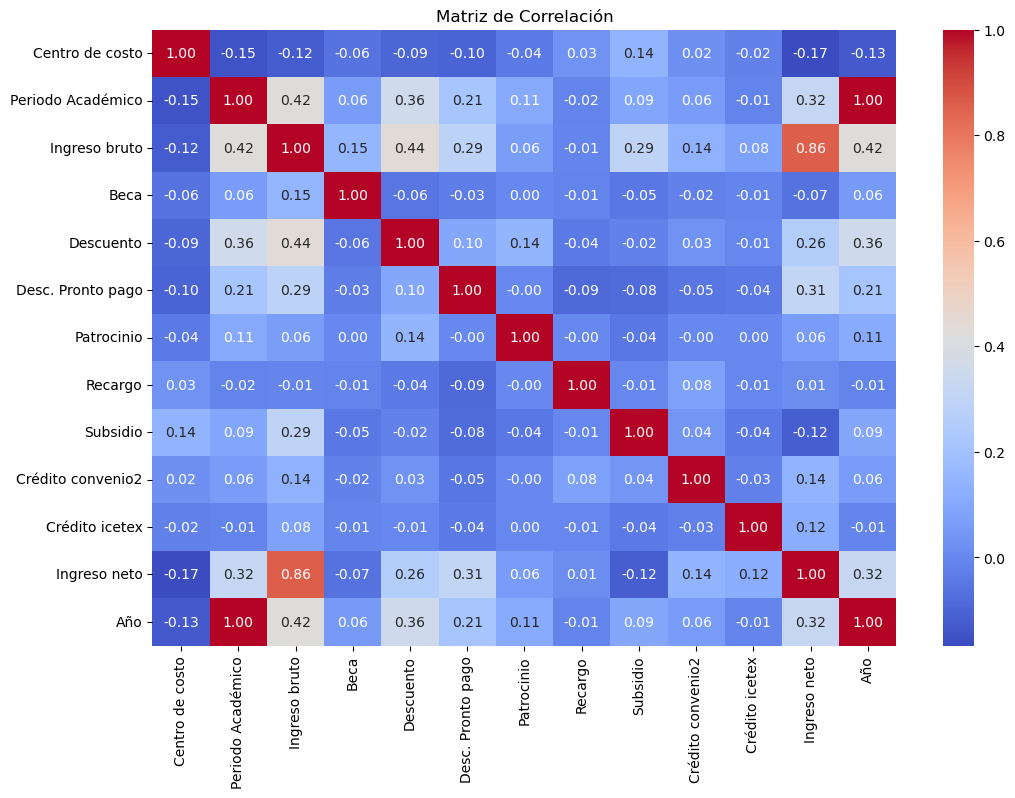

In [12]:
# Correlaciones
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [13]:
# Separar características (X) y etiqueta (y)
X = df.drop('Descuento', axis=1)
y = df['Descuento']

In [14]:
# Escalar los datos (opcional, pero recomendado para modelos lineales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. División del dataset:

In [15]:
# 2. Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3. Analisis con Regresión Lineal:

In [16]:
# 3. Entrenar el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
# 4. Evaluación del modelo
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

## 4. Evaluación del modelo:

In [19]:
# Calcular métricas
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

In [20]:
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

In [21]:
print(f"Métricas en el conjunto de entrenamiento:")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}\n")

Métricas en el conjunto de entrenamiento:
MAE: 12999.408497412162
RMSE: 31786.993865202476
R²: 0.9819349010466192



In [22]:
print(f"Métricas en el conjunto de prueba:")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Métricas en el conjunto de prueba:
MAE: 12974.528768342529
RMSE: 31969.128651939984
R²: 0.9815894307439118


In [23]:
from sklearn.metrics import f1_score

# Definir el umbral para convertir predicciones continuas en binarias
umbral = y_test.median()  # se puede ajustar este umbral si es necesario

# Convertir las etiquetas verdaderas y las predicciones en binarias usando el umbral
y_test_bin = (y_test >= umbral).astype(int)
y_pred_test_bin = (y_pred_test >= umbral).astype(int)

# Calcular el F1 Score
f1_nn = f1_score(y_test_bin, y_pred_test_bin)

print(f'F1 Score para la Regresion: {f1_nn:.4f}')

F1 Score para la Regresion: 0.6750


## 5. Visualización de resultados:

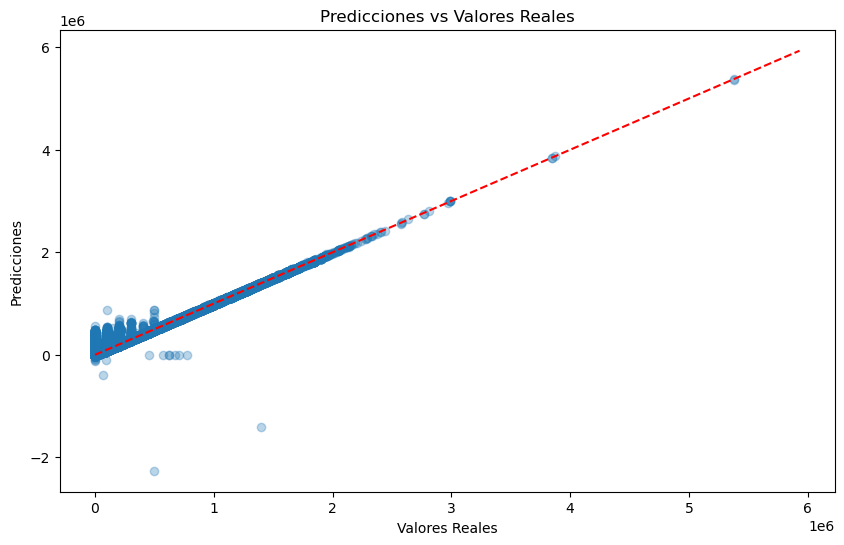

In [24]:
# Gráfico de dispersión de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

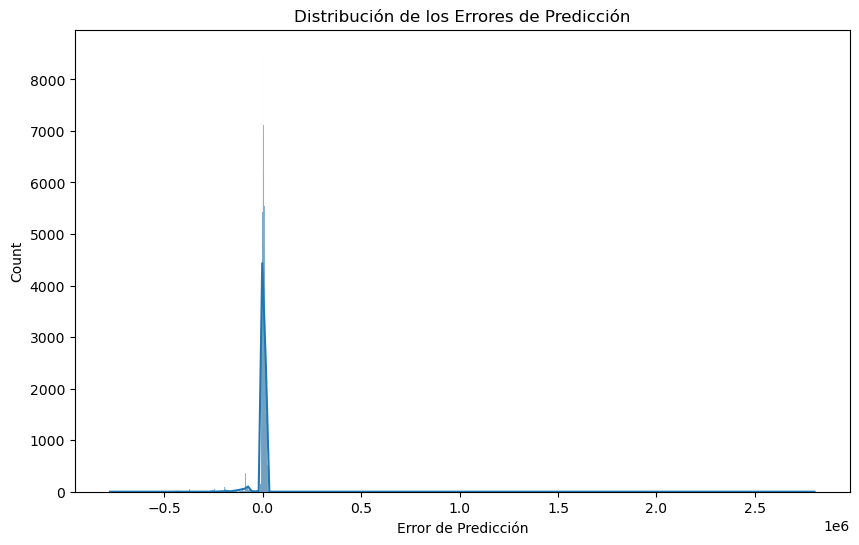

In [25]:
# Histograma de los errores de predicción
errores = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(errores, kde=True)
plt.xlabel('Error de Predicción')
plt.title('Distribución de los Errores de Predicción')
plt.show()

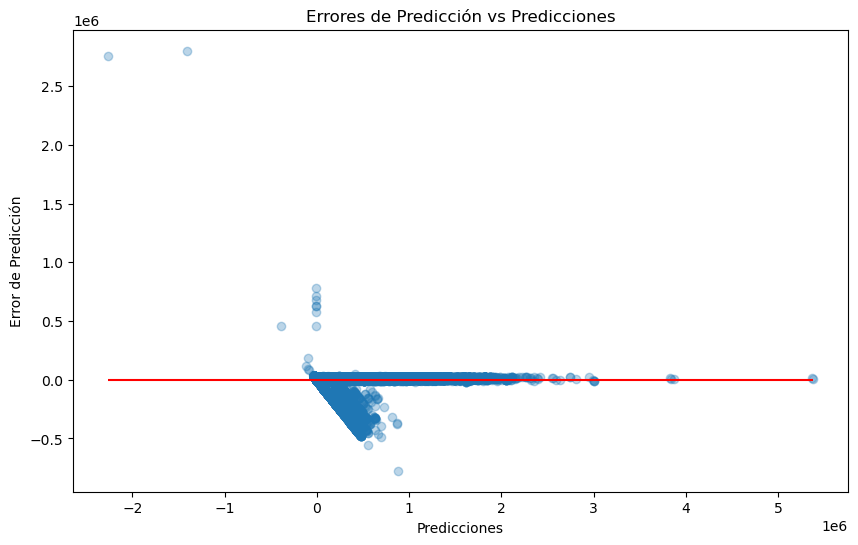

In [26]:
# Gráfico de errores vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, errores, alpha=0.3)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='red')
plt.xlabel('Predicciones')
plt.ylabel('Error de Predicción')
plt.title('Errores de Predicción vs Predicciones')
plt.show()

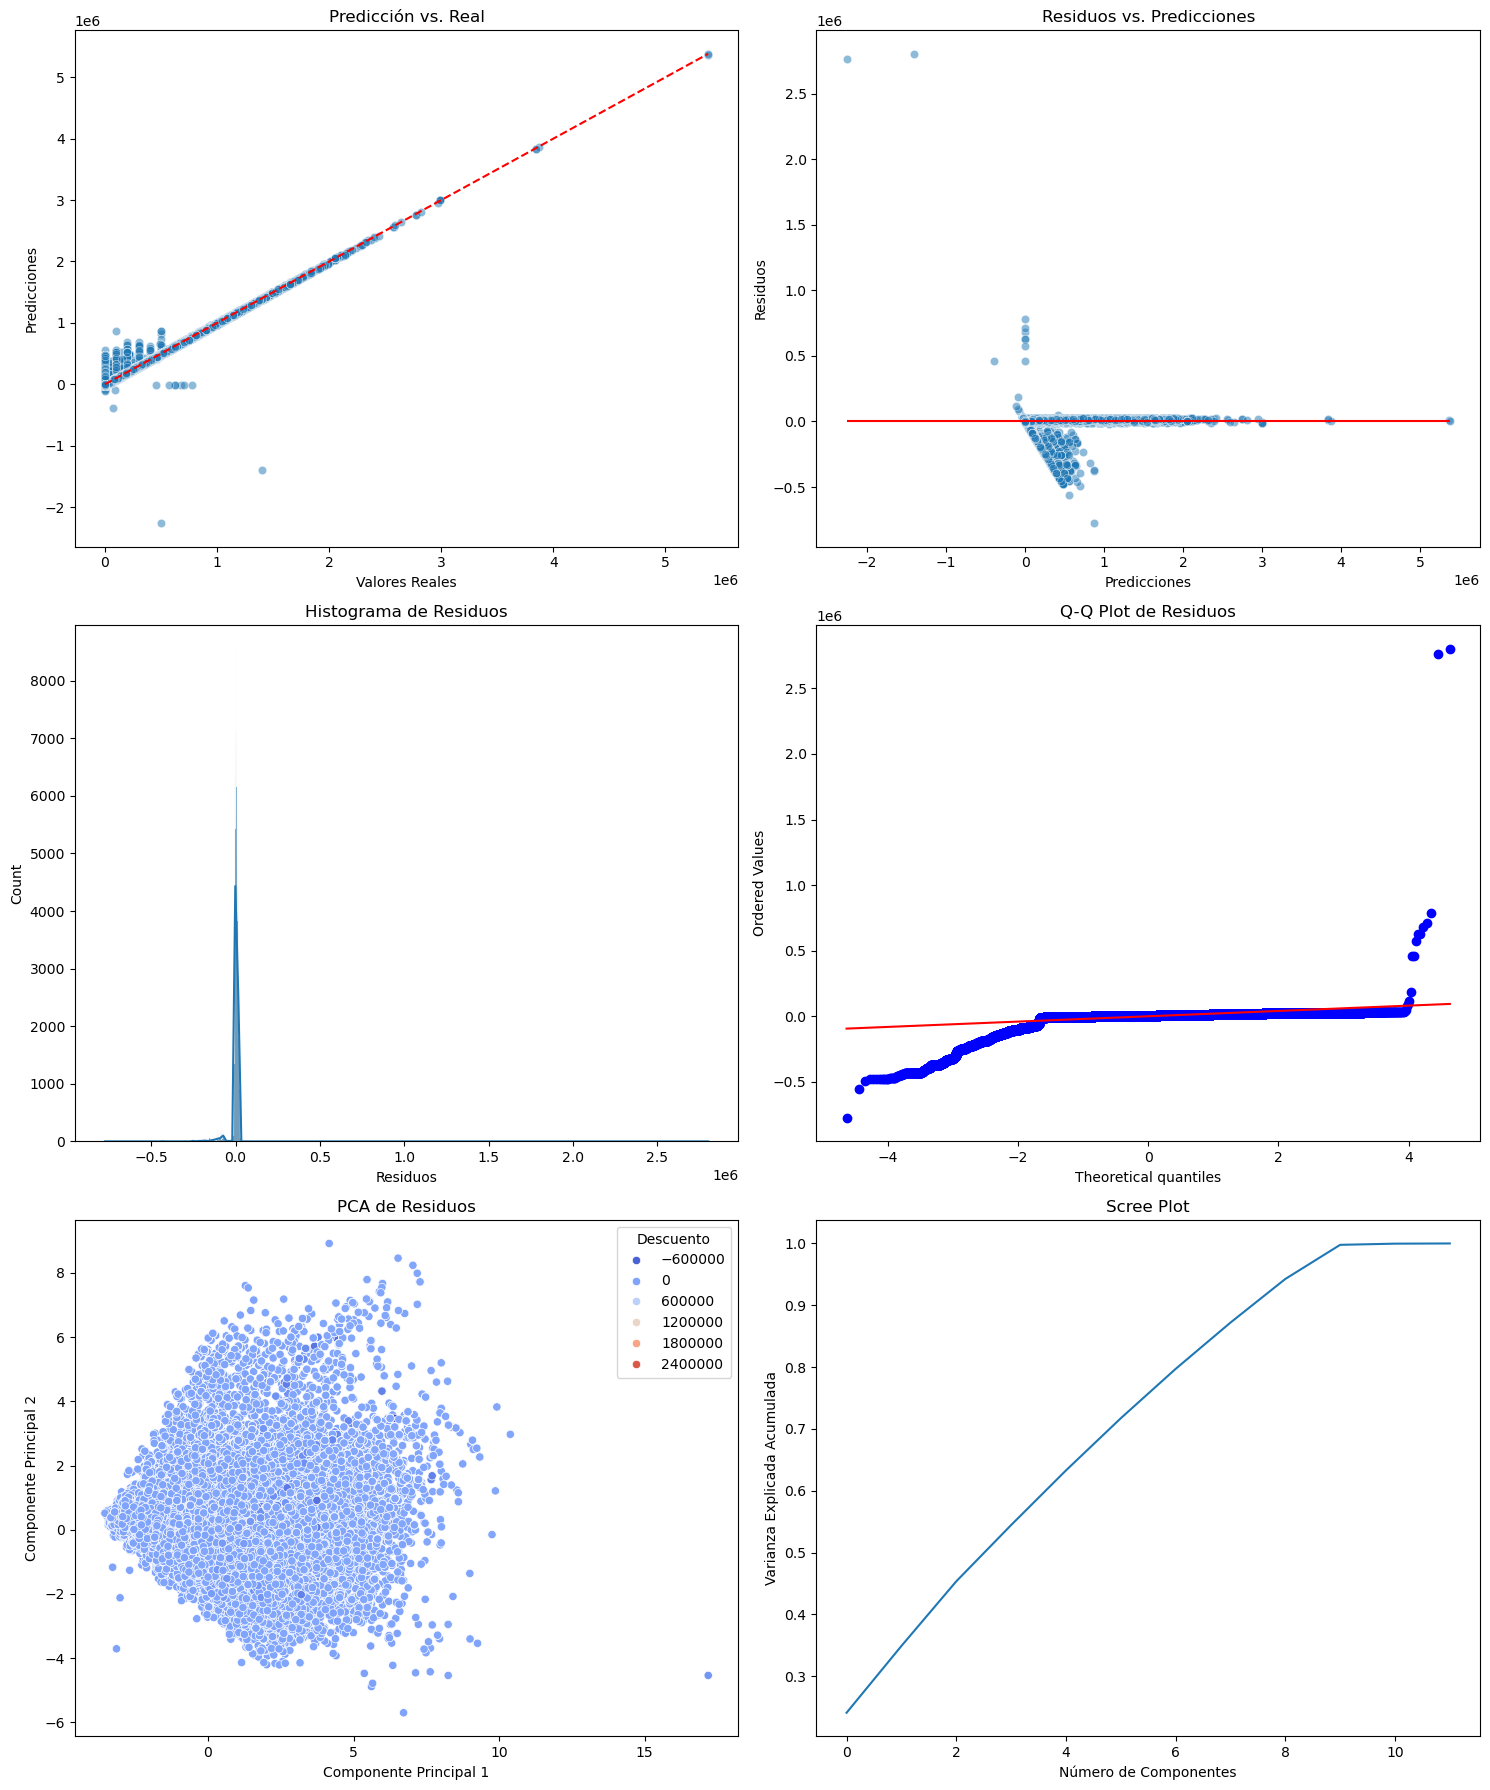

In [27]:
# Crear una figura con subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Predicción vs. Real
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[0, 0], alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 0].set_xlabel('Valores Reales')
axes[0, 0].set_ylabel('Predicciones')
axes[0, 0].set_title('Predicción vs. Real')

# 2. Residuos
residuos = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuos, ax=axes[0, 1], alpha=0.5)
axes[0, 1].hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='red')
axes[0, 1].set_xlabel('Predicciones')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs. Predicciones')

# 3. Histograma de Residuos
sns.histplot(residuos, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_title('Histograma de Residuos')

# 4. Q-Q Plot
stats.probplot(residuos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos')

# 5. PCA de Residuos
# Necesitamos PCA solo si X_test tiene múltiples características
if X_test.shape[1] > 1:
    pca = PCA(n_components=2)
    residuos_pca = pca.fit_transform(X_test)
    sns.scatterplot(x=residuos_pca[:, 0], y=residuos_pca[:, 1], hue=residuos, palette='coolwarm', ax=axes[2, 0])
    axes[2, 0].set_xlabel('Componente Principal 1')
    axes[2, 0].set_ylabel('Componente Principal 2')
    axes[2, 0].set_title('PCA de Residuos')
else:
    axes[2, 0].text(0.5, 0.5, 'PCA no aplicable con una sola característica', ha='center', va='center')
    axes[2, 0].set_title('PCA de Residuos')
    axes[2, 0].axis('off')

# 6. Scree Plot
if X_test.shape[1] > 1:
    pca = PCA().fit(X_test)
    axes[2, 1].plot(np.cumsum(pca.explained_variance_ratio_))
    axes[2, 1].set_xlabel('Número de Componentes')
    axes[2, 1].set_ylabel('Varianza Explicada Acumulada')
    axes[2, 1].set_title('Scree Plot')
else:
    axes[2, 1].text(0.5, 0.5, 'Scree Plot no aplicable con una sola característica', ha='center', va='center')
    axes[2, 1].set_title('Scree Plot')
    axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## 6. Analisis mediante Red Neuronal

In [28]:
# Construir la red neuronal
modelo_nn = Sequential()

# Añadir capas: input layer con activación ReLU, capas ocultas, y output layer
modelo_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
modelo_nn.add(Dense(32, activation='relu'))
modelo_nn.add(Dense(16, activation='relu'))
modelo_nn.add(Dense(1, activation='linear'))  # Salida para regresión

# Compilar el modelo
modelo_nn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
historial = modelo_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38483/38483 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - loss: 22901618688.0000 - val_loss: 476589344.0000
Epoch 2/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 454557888.0000 - val_loss: 378715552.0000
Epoch 3/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 330793920.0000 - val_loss: 205062096.0000
Epoch 4/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 185662896.0000 - val_loss: 138480800.0000
Epoch 5/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - loss: 124072488.0000 - val_loss: 114661312.0000
Epoch 6/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 102752976.0000 - val_loss: 103913136.0000
Epoch 7/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - loss: 92107752.0000 - val_loss: 94591840.0000
Epoch 8/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 89504232.0000 - val_loss: 92428640.0000
Epoch 9/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step - loss: 80927472.0000 - val_loss: 87940168.0000
Epoch 10/10
38483/38483 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms

## 7. Entrenando el modelo

In [29]:
# Hacer predicciones con el modelo entrenado
y_pred_train = modelo_nn.predict(X_train)
y_pred_test = modelo_nn.predict(X_test)

# Convertir a 1D
y_pred_train = y_pred_train.flatten()
y_pred_test = y_pred_test.flatten()

# Calcular las métricas
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Mostrar los resultados
print(f'MAE (Train): {mae_train}')
print(f'MAE (Test): {mae_test}')
print(f'RMSE (Train): {rmse_train}')
print(f'RMSE (Test): {rmse_test}')
print(f'R² (Train): {r2_train}')
print(f'R² (Test): {r2_test}')


48104/48104 ━━━━━━━━━━━━━━━━━━━━ 40s 827us/step
12026/12026 ━━━━━━━━━━━━━━━━━━━━ 10s 811us/step
MAE (Train): 1434.8569419605024
MAE (Test): 1444.7890244856717
RMSE (Train): 8587.967816009239
RMSE (Test): 8767.549883175236
R² (Train): 0.9986813721468114
R² (Test): 0.9986152795392261


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
from sklearn.metrics import f1_score

# Definir el umbral para convertir predicciones continuas en binarias
umbral = y_test.median()  # Puedes ajustar este umbral si es necesario

# Convertir las etiquetas verdaderas y las predicciones en binarias usando el umbral
y_test_bin = (y_test >= umbral).astype(int)
y_pred_test_bin = (y_pred_test >= umbral).astype(int)

# Calcular el F1 Score
f1_nn = f1_score(y_test_bin, y_pred_test_bin)

print(f'F1 Score para la Red Neuronal: {f1_nn:.4f}')

F1 Score para la Red Neuronal: 0.7229


## 8. Visualización de resultados

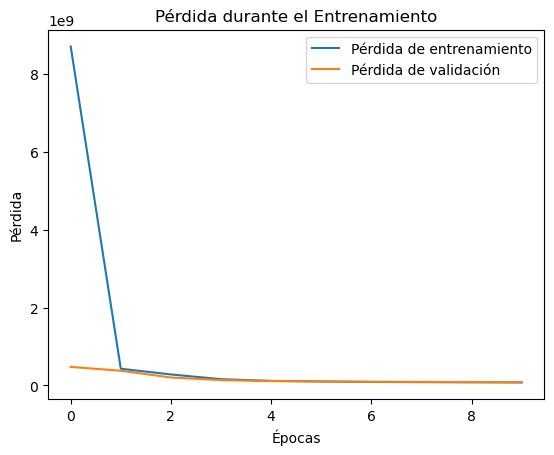

In [30]:
# Graficar el historial de entrenamiento
plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.show()

AttributeError: 'Axes' object has no attribute 'legend_elements'

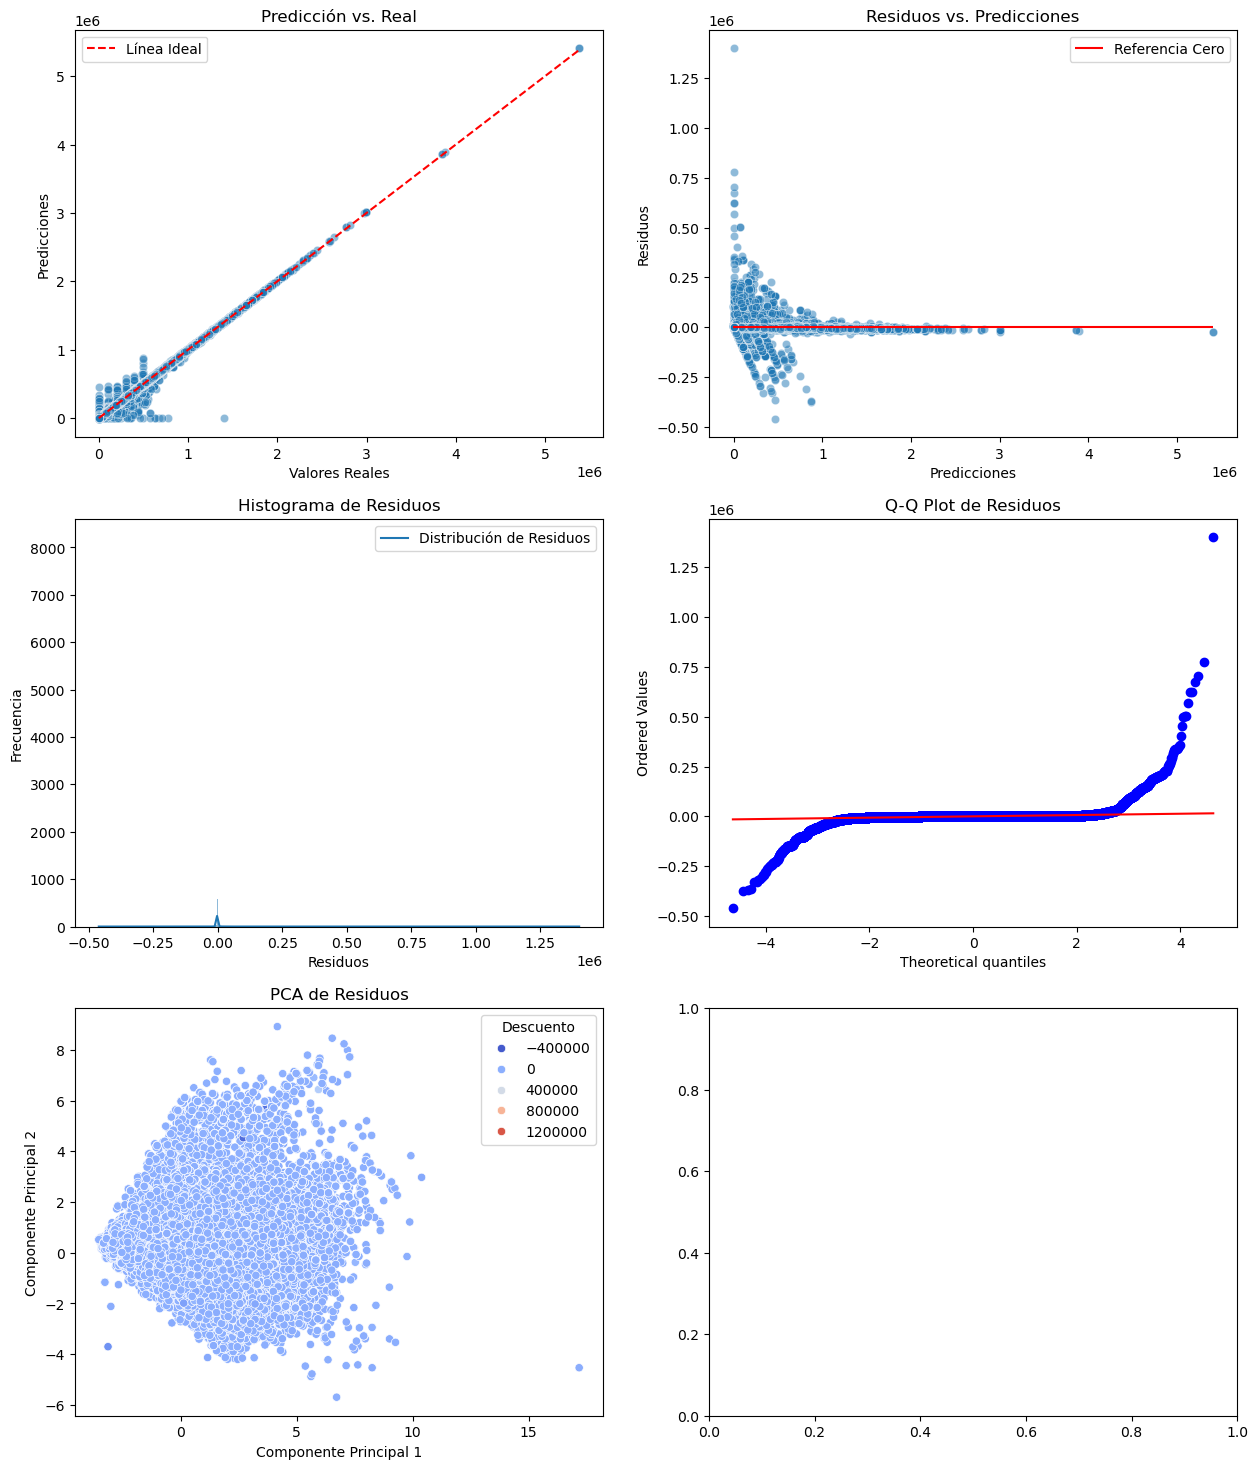

In [31]:
# Crear una figura con subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Predicción vs. Real
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[0, 0], alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea Ideal')
axes[0, 0].set_xlabel('Valores Reales')
axes[0, 0].set_ylabel('Predicciones')
axes[0, 0].set_title('Predicción vs. Real')
axes[0, 0].legend()

# 2. Residuos
residuos = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuos, ax=axes[0, 1], alpha=0.5)
axes[0, 1].hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='red', label='Referencia Cero')
axes[0, 1].set_xlabel('Predicciones')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Residuos vs. Predicciones')
axes[0, 1].legend()

# 3. Histograma de Residuos
sns.histplot(residuos, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Residuos')
axes[1, 0].legend(['Distribución de Residuos'])

# 4. Q-Q Plot
stats.probplot(residuos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos')

# 5. PCA de Residuos
# Necesitamos PCA solo si X_test tiene múltiples características
if X_test.shape[1] > 1:
    pca = PCA(n_components=2)
    residuos_pca = pca.fit_transform(X_test)
    scatter = sns.scatterplot(x=residuos_pca[:, 0], y=residuos_pca[:, 1], hue=residuos, palette='coolwarm', ax=axes[2, 0])
    axes[2, 0].set_xlabel('Componente Principal 1')
    axes[2, 0].set_ylabel('Componente Principal 2')
    axes[2, 0].set_title('PCA de Residuos')
    legend = axes[2, 0].legend(*scatter.legend_elements(), title="Residuos")
else:
    axes[2, 0].text(0.5, 0.5, 'PCA no aplicable con una sola característica', ha='center', va='center')
    axes[2, 0].set_title('PCA de Residuos')
    axes[2, 0].axis('off')

# 6. Scree Plot
if X_test.shape[1] > 1:
    pca = PCA().fit(X_test)
    axes[2, 1].plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
    axes[2, 1].set_xlabel('Número de Componentes')
    axes[2, 1].set_ylabel('Varianza Explicada Acumulada')
    axes[2, 1].set_title('Scree Plot')
    axes[2, 1].legend(['Varianza Explicada'])
else:
    axes[2, 1].text(0.5, 0.5, 'Scree Plot no aplicable con una sola característica', ha='center', va='center')
    axes[2, 1].setTitle('Scree Plot')
    axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


## 9. Conclusiones y recomendaciones

### Precisión del Modelo:

* Red Neuronal: La red neuronal ha mostrado un rendimiento superior con un R² de aproximadamente 0.9986 tanto en el conjunto de entrenamiento como en el de prueba. Esto indica que el modelo es capaz de explicar más del 99.8% de la variabilidad en los datos de "Descuento", lo cual es muy elevado. Además, el MAE y RMSE son significativamente menores en comparación con la regresión lineal, lo que sugiere que las predicciones de la red neuronal están más cerca de los valores reales.
* Regresión Lineal: La regresión lineal también muestra un buen rendimiento con un R² de 0.9819, lo que significa que explica el 98.19% de la variabilidad. Sin embargo, sus errores (MAE y RMSE) son mayores en comparación con la red neuronal, indicando que las predicciones son menos precisas.

### F1 Score:

* Red Neuronal: El F1 Score para la red neuronal es 0.7229, superior al de la regresión lineal (0.6750). Esto indica que la red neuronal tiene un mejor equilibrio entre precisión y recall, siendo más efectiva en identificar correctamente las clases.
* Regresión Lineal: Aunque tiene un buen F1 Score, es inferior al de la red neuronal, lo que sugiere que la regresión lineal podría estar fallando más en casos de falsos positivos o falsos negativos.

### Generalización del Modelo:

* Red Neuronal: Los valores de MAE, RMSE y R² son muy similares entre los conjuntos de entrenamiento y prueba, lo que sugiere que el modelo generaliza bien y no está sobreajustado.
* Regresión Lineal: Al observar las métricas de entrenamiento y prueba, vemos que el modelo de regresión lineal tiene un rendimiento muy consistente entre ambos conjuntos. El R² en entrenamiento es de 0.9819, y en prueba es de 0.9816, lo que indica que el modelo generaliza bien y no está sobreajustado. Los valores de MAE y RMSE son también muy cercanos entre el conjunto de entrenamiento y el de prueba, lo que sugiere que el modelo mantiene su precisión al predecir nuevos datos. Sin embargo, a pesar de este buen rendimiento, la red neuronal ha demostrado ser más precisa en general.

### Recomendaciones

### Selección del Modelo:

* Red Neuronal: Dado que la red neuronal ha mostrado un rendimiento superior en términos de precisión y capacidad de generalización, sería recomendable utilizar este modelo para predecir los descuentos en la institución. Su menor MAE y RMSE indican que hará predicciones más cercanas a los valores reales, lo cual es crucial en un contexto de facturación.
* Regresión Lineal: Aunque la regresión lineal es más sencilla de interpretar y menos exigente computacionalmente, los resultados sugieren que podría no ser la mejor opción si se requiere la mayor precisión posible.

### Mejoras Potenciales:

* Red Neuronal: Se puede considerar ajustar aún más los hiperparámetros de la red neuronal (como el número de capas, neuronas, tasa de aprendizaje, etc.) para ver si se puede mejorar ligeramente el rendimiento. Además, la introducción de técnicas como la regularización podría ayudar a reducir aún más los errores.
* Regresión Lineal: sSe pueden explorar otras formas de regresión, como la regresión polinómica o la regresión con regularización (Ridge, Lasso), que podrían capturar mejor las relaciones no lineales en los datos.

### Consideración de la Interpretabilidad:

Aunque la red neuronal es más precisa, si la interpretabilidad del modelo es una prioridad, se puede seguir utilizando la regresión lineal o adoptar técnicas como los árboles de decisión que son más interpretables y pueden ofrecer una buena precisión.
En resumen, la red neuronal parece ser la mejor opción para predecir los descuentos en este caso, pero es importante considerar también la facilidad de interpretación y las necesidades específicas del negocio.